In [3]:
import pickle

In [5]:
with open('ModelParameter_2.p', 'rb') as handle:
    data = pickle.load(handle)

In [6]:
data

{'W': array([[-1.07435449e+03, -1.05772342e+03, -1.04996097e+03, ...,
         -1.02679590e+03, -1.04437186e+03, -1.02425601e+03],
        [ 8.42766833e+01,  8.30513847e+01,  8.70319667e+01, ...,
          8.50937337e+01,  9.15106544e+01,  1.12023019e+02],
        [-5.20622571e+00,  3.23865790e+00, -2.02093069e+00, ...,
          1.63423790e+00, -8.39714596e+00, -2.71043305e+01],
        ...,
        [ 3.39926863e+01,  3.60196265e+01,  2.46194125e+01, ...,
          3.22304855e+01,  2.70007907e+01,  2.45642446e+01],
        [ 5.36494474e-01,  5.27978806e-01,  5.24244203e-01, ...,
          5.12692641e-01,  5.21577764e-01,  5.11429831e-01],
        [ 8.84843187e-03,  1.11391978e-02,  9.64719801e-03, ...,
          1.36946325e-02,  9.93751040e-03,  1.75315583e-02]]),
 'E': array([[  5.63838977,   6.03102568,   5.82311771,   5.43098403,
           5.71205831,   5.43716705,   5.51829181,   5.42712662,
           5.42053441,   5.18011802,   5.93988705,   6.36421922,
           5.66527509,  

In [9]:
import numpy as np
selection=(data['E']<5.5)
selection=selection.reshape((selection.size,))
W=data['W']
W_smallerr=W[:,selection]
W_final=np.mean(W_smallerr,axis=1).reshape((W_smallerr.shape[0],1))

In [10]:
W_final

array([[-1.04511810e+03],
       [ 8.89013237e+01],
       [-5.38747982e+00],
       [ 8.35138439e+01],
       [-6.22178707e+00],
       [ 2.73421686e+01],
       [ 5.21906889e-01],
       [ 1.04889395e-02]])

In [11]:
W_mean=np.mean(W,axis=1).reshape((W.shape[0],1))

In [13]:
Model={'W': W, 'E': data['E'], 'W_final': W_final, 'W_mean': W_mean}

In [14]:
Model

{'W': array([[-1.07435449e+03, -1.05772342e+03, -1.04996097e+03, ...,
         -1.02679590e+03, -1.04437186e+03, -1.02425601e+03],
        [ 8.42766833e+01,  8.30513847e+01,  8.70319667e+01, ...,
          8.50937337e+01,  9.15106544e+01,  1.12023019e+02],
        [-5.20622571e+00,  3.23865790e+00, -2.02093069e+00, ...,
          1.63423790e+00, -8.39714596e+00, -2.71043305e+01],
        ...,
        [ 3.39926863e+01,  3.60196265e+01,  2.46194125e+01, ...,
          3.22304855e+01,  2.70007907e+01,  2.45642446e+01],
        [ 5.36494474e-01,  5.27978806e-01,  5.24244203e-01, ...,
          5.12692641e-01,  5.21577764e-01,  5.11429831e-01],
        [ 8.84843187e-03,  1.11391978e-02,  9.64719801e-03, ...,
          1.36946325e-02,  9.93751040e-03,  1.75315583e-02]]),
 'E': array([[  5.63838977,   6.03102568,   5.82311771,   5.43098403,
           5.71205831,   5.43716705,   5.51829181,   5.42712662,
           5.42053441,   5.18011802,   5.93988705,   6.36421922,
           5.66527509,  

In [15]:
with open('ModelParameter_3.p','wb') as fp:
    pickle.dump(Model,fp)

In [17]:
import pandas as pd
df_test=pd.read_csv('../input/test.csv')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [18]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    df['abs_dist_travel'] = df.abs_diff_longitude + df.abs_diff_latitude

In [19]:
def add_loc_bias_feature(df):
    lat_mean=40.75
    long_mean=-73.97
    df['up_diff_center'] = np.sqrt((df.pickup_latitude-lat_mean)**2 + (df.pickup_longitude-long_mean)**2)
    df['off_diff_center'] = np.sqrt((df.dropoff_latitude-lat_mean)**2 + (df.dropoff_longitude-long_mean)**2)

In [20]:
def add_time_features(df):
    timecol=pd.to_datetime(df['pickup_datetime'],infer_datetime_format=True)
    df['pickup_year'] = timecol.dt.year
    df['pickup_hour'] = timecol.dt.hour

In [21]:
add_travel_vector_features(df_test)
add_loc_bias_feature(df_test)
add_time_features(df_test)

df=df_test

test_X=np.column_stack((np.ones(len(df)), df.abs_diff_longitude, df.abs_diff_latitude, df.abs_dist_travel, df.up_diff_center, df.off_diff_center, df.pickup_year, df.pickup_hour))

In [22]:
W_mean

array([[-1.04939479e+03],
       [ 8.90418732e+01],
       [-5.34368990e+00],
       [ 8.36981833e+01],
       [-6.19077370e+00],
       [ 2.76141748e+01],
       [ 5.24025538e-01],
       [ 1.02453194e-02]])

In [23]:
test_y_est = np.matmul(test_X, W_mean).round(decimals = 2)

In [24]:
test_y_est.shape

(9914, 1)

In [25]:
submission = pd.DataFrame(
    {'key': df_test.key, 'fare_amount': test_y_est.reshape((len(test_y_est),))},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_lsr_mean.csv', index = False)

In [26]:
Model

{'W': array([[-1.07435449e+03, -1.05772342e+03, -1.04996097e+03, ...,
         -1.02679590e+03, -1.04437186e+03, -1.02425601e+03],
        [ 8.42766833e+01,  8.30513847e+01,  8.70319667e+01, ...,
          8.50937337e+01,  9.15106544e+01,  1.12023019e+02],
        [-5.20622571e+00,  3.23865790e+00, -2.02093069e+00, ...,
          1.63423790e+00, -8.39714596e+00, -2.71043305e+01],
        ...,
        [ 3.39926863e+01,  3.60196265e+01,  2.46194125e+01, ...,
          3.22304855e+01,  2.70007907e+01,  2.45642446e+01],
        [ 5.36494474e-01,  5.27978806e-01,  5.24244203e-01, ...,
          5.12692641e-01,  5.21577764e-01,  5.11429831e-01],
        [ 8.84843187e-03,  1.11391978e-02,  9.64719801e-03, ...,
          1.36946325e-02,  9.93751040e-03,  1.75315583e-02]]),
 'E': array([[  5.63838977,   6.03102568,   5.82311771,   5.43098403,
           5.71205831,   5.43716705,   5.51829181,   5.42712662,
           5.42053441,   5.18011802,   5.93988705,   6.36421922,
           5.66527509,  

In [27]:
E=Model['E']

In [28]:
E

array([[  5.63838977,   6.03102568,   5.82311771,   5.43098403,
          5.71205831,   5.43716705,   5.51829181,   5.42712662,
          5.42053441,   5.18011802,   5.93988705,   6.36421922,
          5.66527509,   5.58053501,   4.97496372,   5.88845855,
          5.70437763,   5.26123273,   5.30492852,   5.57620808,
          5.62653725,   5.80361646,   5.27938231,   5.90508638,
          5.73730116,   5.52444262,   5.9918451 ,   5.99134931,
          6.16953841,   4.8752522 ,   5.97413106,   5.2629328 ,
          5.41170922,   5.15777706,   5.54788974,   5.09981527,
          5.38339289,   6.88899488,   5.83834618,   5.82698574,
          5.71559821,   5.65603162,   5.12847267,   6.0912308 ,
          5.45952199,   5.7272092 ,   5.89729198,   5.11441896,
          5.92938559,   5.2389435 ,   6.26768474,   4.90842064,
          5.89704726,   5.63814525,   5.11014917,   5.74975908,
          6.24784442,   5.91883415,   6.0702241 ,   6.75474529,
          5.73514898,   5.35049209,   5.

In [29]:
import matplotlib.pyplot as plt

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

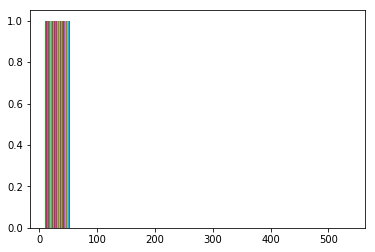

In [32]:
plt.hist(E,bins=10)

In [2]:
with open('ModelParameter.p','rb') as fp:
    data=pickle.load(fp)

In [3]:
data

{'W': array([[-1.09006566e+03, -1.06368710e+03, -1.09027007e+03, ...,
         -1.03247981e+03, -1.06231299e+03, -1.02425601e+03],
        [ 9.00088679e+01,  7.56496188e+01,  8.75363931e+01, ...,
          9.10272614e+01,  9.06519453e+01,  1.12023019e+02],
        [-1.43943915e+01,  7.98777260e+00, -3.72599880e+00, ...,
         -7.20426588e+00, -7.09464468e+00, -2.71043305e+01],
        ...,
        [ 3.22108430e+01,  3.61302333e+01,  3.88752788e+01, ...,
          3.55131439e+01,  1.84362741e+01,  2.45642446e+01],
        [ 5.44346253e-01,  5.31123846e-01,  5.44235236e-01, ...,
          5.15589398e-01,  5.30553945e-01,  5.11429831e-01],
        [ 9.82820931e-03,  8.54839888e-03,  9.29822476e-03, ...,
          1.02838110e-02,  9.76619279e-03,  1.75315583e-02]]),
 'E': array([[12.645823  , 12.76061934, 12.5041057 , 12.58908404, 12.4145064 ,
         12.1861876 , 12.36980915, 12.49693166, 12.22225931, 12.75995138,
         12.54071656, 12.08652324, 11.96305775, 12.17290852, 12.6816145

In [4]:
data.size

AttributeError: 'dict' object has no attribute 'size'

In [5]:
W=data['W']

In [6]:
E=data['E']

In [9]:
E

array([[12.645823  , 12.76061934, 12.5041057 , 12.58908404, 12.4145064 ,
        12.1861876 , 12.36980915, 12.49693166, 12.22225931, 12.75995138,
        12.54071656, 12.08652324, 11.96305775, 12.17290852, 12.68161451,
        12.39855641, 12.14134985, 12.20988825, 12.28465343, 12.17811896,
        13.02854731, 12.76727426, 13.04205769, 12.94336638, 12.76075914,
        12.81487162, 12.46106267, 12.34579056, 12.46938813, 12.06345287,
        12.5281632 , 12.33828101, 12.65826314, 12.35654413, 12.66276882,
        12.39361159, 12.33824954, 12.62774359, 12.72418399, 11.82490181,
        12.19130979, 12.62902642, 12.80829682, 11.9555164 , 12.3081487 ,
        11.9645859 , 12.33851858, 13.01089287, 15.80796449, 12.90726878,
        12.51560699, 12.4249174 , 12.60269364, 12.72523267, 12.25827639,
        12.69071846, 12.38905083, 12.69144848, 11.70544413, 12.16359545,
        12.92449642, 12.60909575, 12.3255418 , 12.42918088, 13.27260514,
        12.75073456, 12.38985004, 12.25124676, 12.7

In [11]:
E.shape

(1, 555)

In [34]:
E.shape

(1, 278)

In [35]:
W.shape

(8, 278)

In [43]:
np.sum(E<5.2,axis=1)

array([42])

In [44]:
selection=(E<5.2)
selection=selection.reshape((selection.size,))
W_smallerr_2=W[:,selection]
W_final_2=np.mean(W_smallerr,axis=1).reshape((W_smallerr.shape[0],1))

In [45]:
test_y_est_2 = np.matmul(test_X, W_final_2).round(decimals = 2)

In [46]:
submission = pd.DataFrame(
    {'key': df_test.key, 'fare_amount': test_y_est_2.reshape((len(test_y_est),))},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_lsr_heavyfiltering.csv', index = False)

In [49]:
df_train=pd.read_csv('../input/train.csv',nrows=100000)

In [50]:
    df_train=df_train.dropna(how = 'any', axis = 'rows')
    df_train=df_train[(df_train.pickup_latitude>39)&
                      (df_train.pickup_latitude<42)&
                      (df_train.pickup_longitude>-74.5)&
                      (df_train.pickup_longitude<-72)&
                      (df_train.dropoff_latitude>39)&
                      (df_train.dropoff_latitude<42)&
                      (df_train.dropoff_longitude>-74.5)&
                      (df_train.dropoff_longitude<-72)&
                      (df_train.fare_amount > 0)&
                      (df_train.passenger_count > 0)]
    add_travel_vector_features(df_train)
    add_loc_bias_feature(df_train)
    add_time_features(df_train)

In [51]:
def get_input_matrix(df):
    return (np.column_stack((np.ones(len(df)), df.abs_diff_longitude, df.abs_diff_latitude, df.abs_dist_travel, df.up_diff_center, df.off_diff_center, df.pickup_year, df.pickup_hour)),df.fare_amount.values.reshape((df.shape[0],1)))

In [52]:
train_X,train_y = get_input_matrix(df_train.iloc[0:df_train.shape[0]*9//10,:])

In [53]:
train_y_est = np.matmul(train_X, W_final).round(decimals = 2)

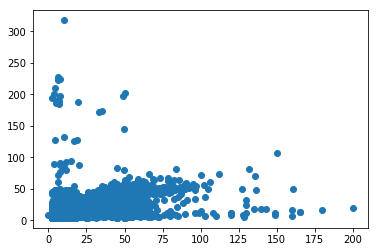

In [54]:
plt.scatter(train_y,train_y_est)

In [56]:
np.mean((train_y-train_y_est)**2)**0.5

5.935659358963989